**1. Import libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")

2. **Load Dataset**

In [62]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. **Data Cleaning**

In [64]:
print(df.isnull().sum())
print(df.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


4. **Data preprocessing**

In [65]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-Hot Encoding
df = pd.get_dummies(df, columns=['InternetService', 'MultipleLines', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


5. **EDA**

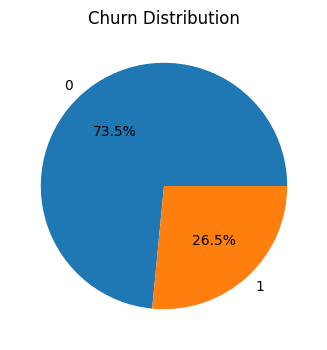

In [67]:
plt.figure(figsize=(8, 4))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

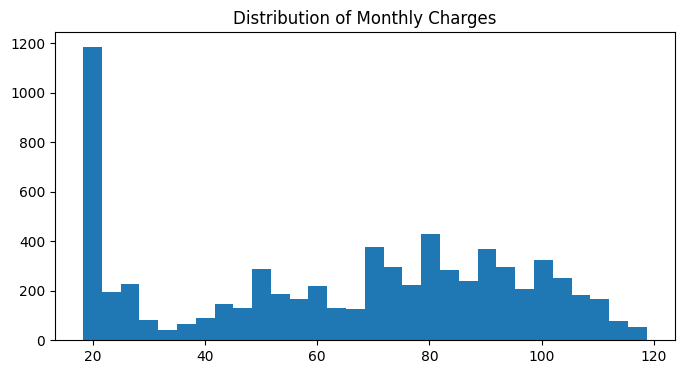

In [68]:
plt.figure(figsize=(8, 4))
plt.hist(df["MonthlyCharges"], bins=30)
plt.title("Distribution of Monthly Charges")
plt.show()

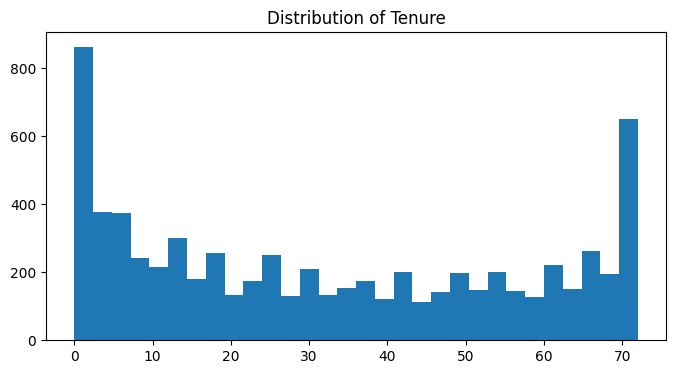

In [69]:
plt.figure(figsize=(8, 4))
plt.hist(df["tenure"], bins=30)
plt.title("Distribution of Tenure")
plt.show()

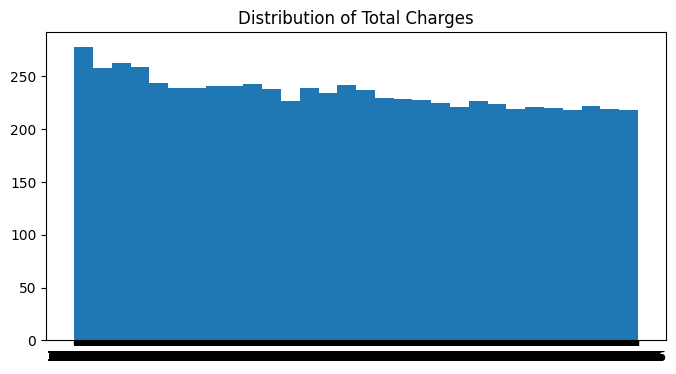

In [70]:
plt.figure(figsize=(8, 4))
plt.hist(df["TotalCharges"], bins=30)
plt.title("Distribution of Total Charges")
plt.show()


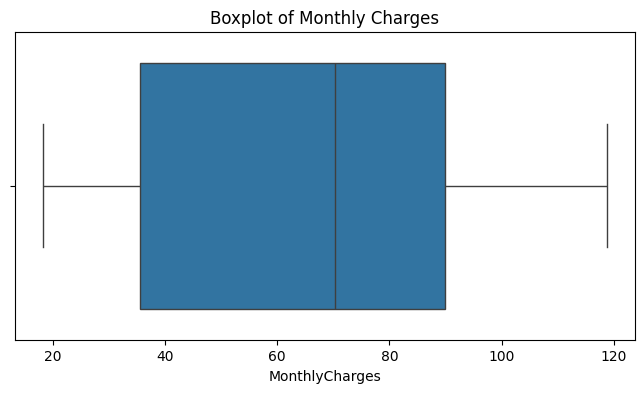

In [71]:
# Boxplot for Outliers in MonthlyCharges
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["MonthlyCharges"])
plt.title("Boxplot of Monthly Charges")
plt.show()


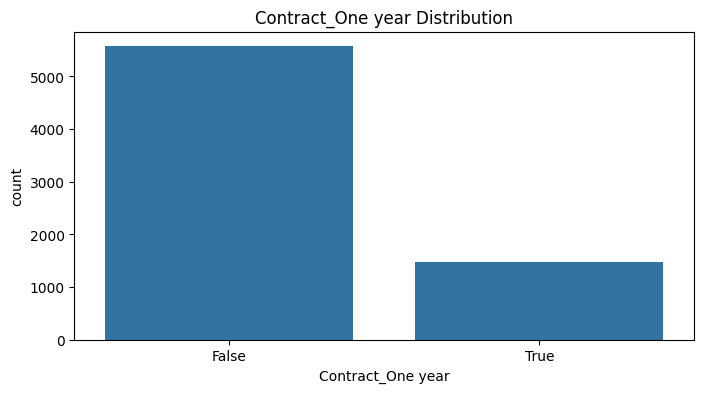

In [72]:
# Countplot for Contract Types
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract_One year', data=df)
plt.title("Contract_One year Distribution")
plt.show()

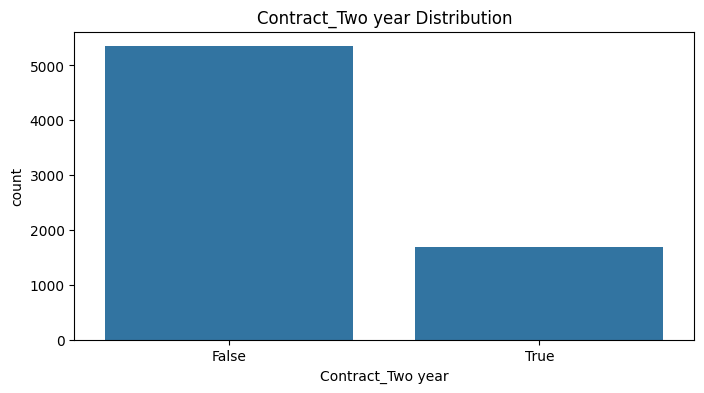

In [73]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract_Two year', data=df)
plt.title("Contract_Two year Distribution")
plt.show()


6. **Feature Selection And Train-Test Split**

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [83]:
y=df[["Churn"]]
x=df[["gender", "SeniorCitizen", "Partner","Dependents", "PhoneService","PaperlessBilling", "tenure", "MonthlyCharges"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

7. **Feature Scaling**

In [84]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

8. **Model Training And Evaluation**

**Logistic Regression**

In [85]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)


In [87]:
print(accuracy_score(y_test, y_pred))


0.8062455642299503


In [88]:
print(confusion_matrix(y_test, y_pred))


[[948  88]
 [185 188]]


In [89]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [90]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

ROC AUC Score: 0.7095396813895473


**KNeighbors Classifier with GridSerachCV**

In [91]:
param_grid_kn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid_kn, cv=5, scoring='accuracy')
gridkn.fit(x_train, y_train)
print(gridkn.best_params_)
y_pred = gridkn.predict(x_test)


{'n_neighbors': 9, 'weights': 'uniform'}


In [92]:
print(accuracy_score(y_test, y_pred))

0.7849538679914834


**SVM With GridSearchCV**

In [93]:
param_grid_svc = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}
gridsvc = GridSearchCV(SVC(), param_grid_svc, cv=5)
gridsvc.fit(x_train, y_train)
print(gridsvc.best_params_)
y_pred = gridsvc.predict(x_test)


{'C': 1, 'kernel': 'rbf'}


In [94]:
print(accuracy_score(y_test, y_pred))

0.7998580553584103


**Decision Tree Classifier With GridSearchCV**

In [95]:
param_grid_tree = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(x_train, y_train)
print(grid_tree.best_params_)
y_pred = grid_tree.predict(x_test)


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'random'}


In [96]:
print(accuracy_score(y_test, y_pred))

0.7885024840312278


**RandonForestClassifier with GridSearchCV**

In [97]:
param_grid_rfc = {
    'n_estimators': [32, 64, 128, 256],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False],
}
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5)
grid_rfc.fit(x_train, y_train)
print(grid_rfc.best_params_)
y_pred = grid_rfc.predict(x_test)


{'bootstrap': True, 'max_features': 4, 'n_estimators': 128}


In [98]:
print(accuracy_score(y_test, y_pred))

0.7700496806245565


In [107]:
models = {
    "Logistic Regression": log_model,
    "KNN": gridkn.best_estimator_,
    "SVM": gridsvc.best_estimator_,
    "Decision Tree": grid_tree.best_estimator_,
    "Random Forest": grid_rfc.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.8062
KNN: Accuracy = 0.7850
SVM: Accuracy = 0.7999
Decision Tree: Accuracy = 0.7885
Random Forest: Accuracy = 0.7700


9. **Save Best Model**

In [114]:
best_model = grid_rfc.best_estimator_
joblib.dump(best_model, 'model.pkl')

['model.pkl']

10. **Feature Importance**

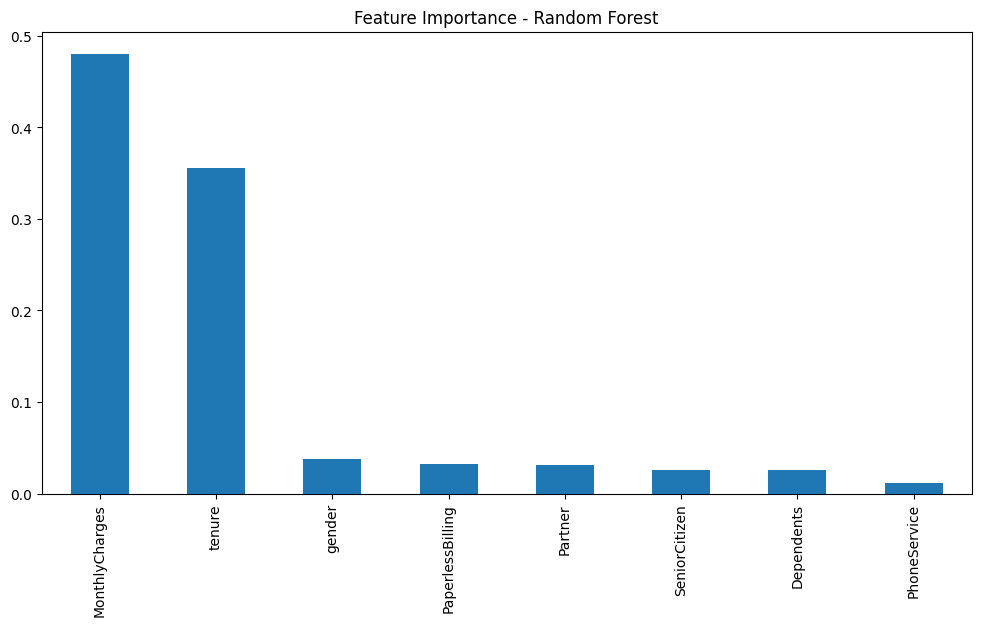

In [115]:
feature_importance = pd.Series(best_model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance - Random Forest')
plt.show()

11. **Cross Validation**

In [116]:
cross_val = cross_val_score(best_model, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Mean:", cross_val.mean())

Cross-Validation Accuracy Mean: 0.7711212215304213
